<a href="https://colab.research.google.com/github/Sameekshaurs/ML_lab/blob/main/day_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns


In [2]:
# Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Keep only digits 0 and 1
train_filter = np.where((y_train == 0) | (y_train == 1))
test_filter = np.where((y_test == 0) | (y_test == 1))

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

print(f"Training samples: {x_train.shape}")
print(f"Testing samples: {x_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: (12665, 28, 28)
Testing samples: (2115, 28, 28)


In [3]:
# Normalize (scale pixel values to 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten 28x28 to 784 features (for Logistic Regression)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)


In [4]:
# Create and fit the model
model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train)


LogisticRegression(max_iter=200)

In [5]:
# Make predictions
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9995


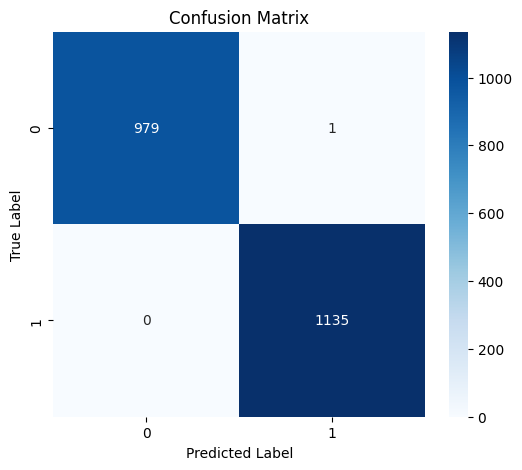

In [6]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Total misclassified: 1


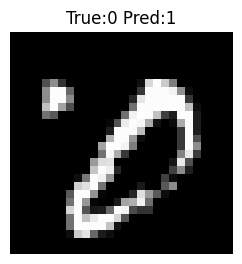

In [7]:
# Find misclassified samples
misclassified_idx = np.where(y_pred != y_test)[0]
print(f"Total misclassified: {len(misclassified_idx)}")

# Plot some misclassified images
if len(misclassified_idx) > 0:
    plt.figure(figsize=(12, 6))
    for i, idx in enumerate(misclassified_idx[:10]):  # Show up to 10 misclassified
        plt.subplot(2, 5, i+1)
        plt.imshow(x_test[idx].reshape(28, 28), cmap="gray")
        plt.title(f"True:{y_test[idx]} Pred:{y_pred[idx]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()
else:
    print("No misclassified samples!")
